## PIL Image


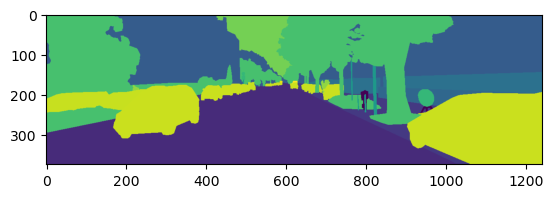

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

image_path="images/000000_10_bw.png"
pil_image = Image.open(image_path)
#pil_image.show() # this will open it on your machine
plt.imshow(pil_image)
plt.show()

In [7]:
w, h = pil_image.size
print('width: ', w)
print('height:', h)

width:  1242
height: 375


When you convert a PIL image to a tensor using `to_tensor()`, the order is indeed correct: **C, H, W** (channels, height, width).

In [8]:
from torchvision import transforms
import torch
to_tensor = transforms.ToTensor()
tensor_img = to_tensor(pil_image)
print(tensor_img.shape, tensor_img.dtype)

torch.Size([1, 375, 1242]) torch.int16


## OpenCV
In OpenCV, if your image is a single channel (black and white) the `shape` has the length of `2` will only return height and width, you can use `cv2.IMREAD_UNCHANGED` so it reads the image as it is:

In [12]:
import cv2

cv_image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
h, w = cv_image.shape[:2]  # Get first two dimensions (height, width)
channels = cv_image.shape[2] if len(cv_image.shape) == 3 else 1
print("height, width, and channels:", h, w, channels)

height, width, and channels: 375 1242 1


In OpenCV images, you need to be careful because OpenCV uses a different color channel order:

- **PIL/RGB**: Red, Green, Blue
- **OpenCV/BGR**: Blue, Green, Red

In [15]:
image_path="images/000000_10_rgb.png"

# Read image with OpenCV
cv_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # BGR format

# Convert BGR to RGB before tensor conversion
cv_image_rgb = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)

# Convert to tensor (now it will be RGB, not BGR)
to_tensor = ToTensor()
tensor_img = to_tensor(cv_image_rgb)

print("Tensor shape:", tensor_img.shape)  # Should be [C, H, W]
print("Channel order: RGB" if tensor_img.shape[0] == 3 else "Grayscale")



Tensor shape: torch.Size([3, 375, 1242])
Channel order: RGB



**Key points:**

1. **Channel order**: `to_tensor()` always produces **C, H, W** format regardless of input
2. **Color conversion**: OpenCV reads images in BGR format, so you need `cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)` to convert to RGB before tensor conversion
3. **Alternative**: You can also use `cv2.IMREAD_COLOR` and then convert, or use `cv2.IMREAD_UNCHANGED` if you want to preserve the original format

The tensor shape will be `[channels, height, width]` in both cases, but the channel values will be different if you don't convert from BGR to RGB.
